# Analysis of the DeePyMoD Output for Van der Pol

In [1]:
# imports
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import seaborn as sns
import re
import math
import matplotlib.gridspec as gridspec

In [2]:
# load folder directory of batch
batch = "VanderPol/without_noise"
out_dir_org = f"C:/Users/Maria/Documents/Masterstudium/Masterarbeit/deepmod_output/output_LRZ_Cluster_10-27_structured/{batch}/"

plot_output = "C:/Users/Maria/Documents/Masterstudium/Masterarbeit/Plots/"

# run_specifications
n_taxa = 2

# list files in batch run
out_dir = out_dir_org
os.listdir(out_dir)

# store standard matplotlib colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Fit plots

## Summarize all plots out of one folder

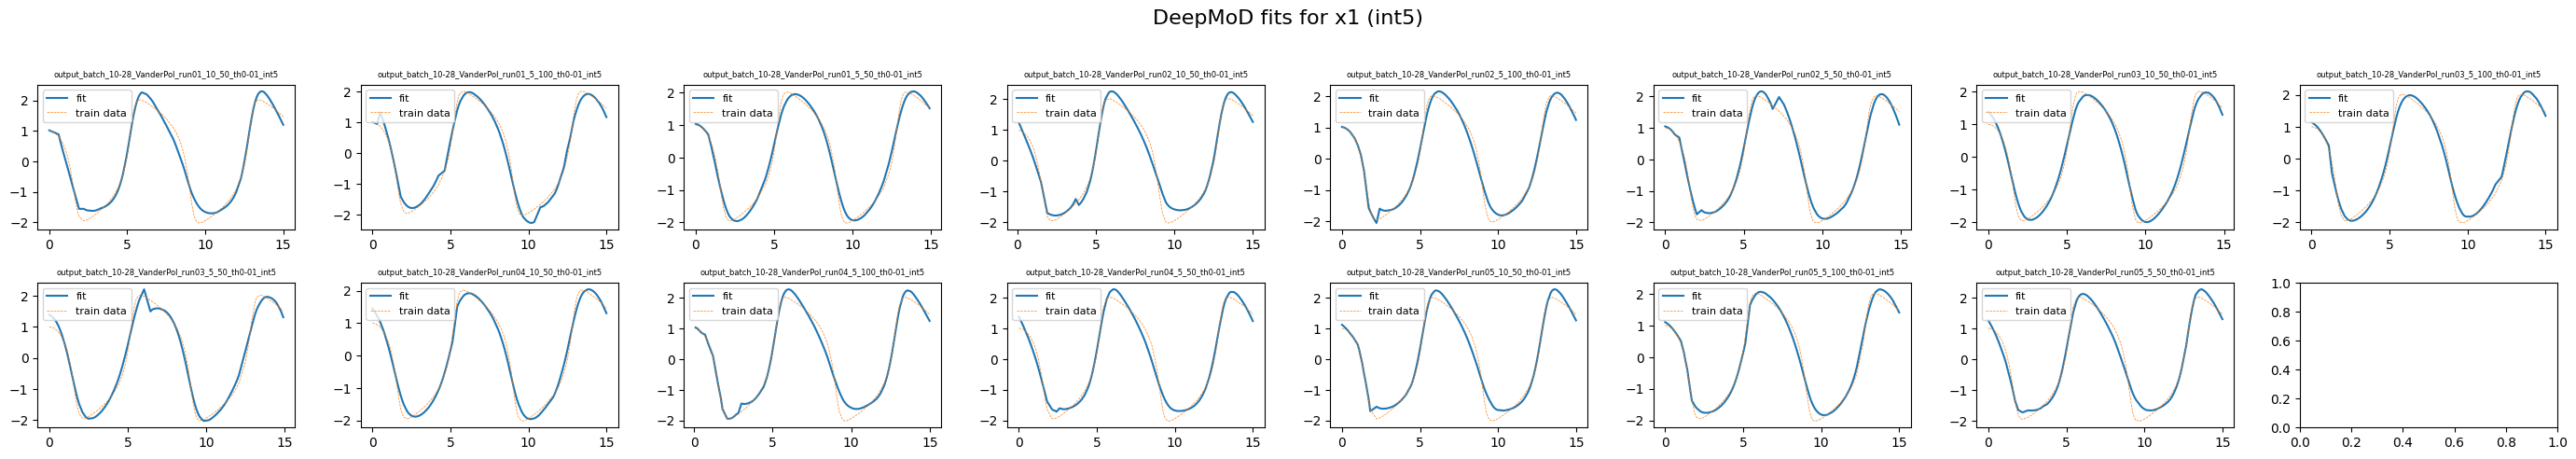

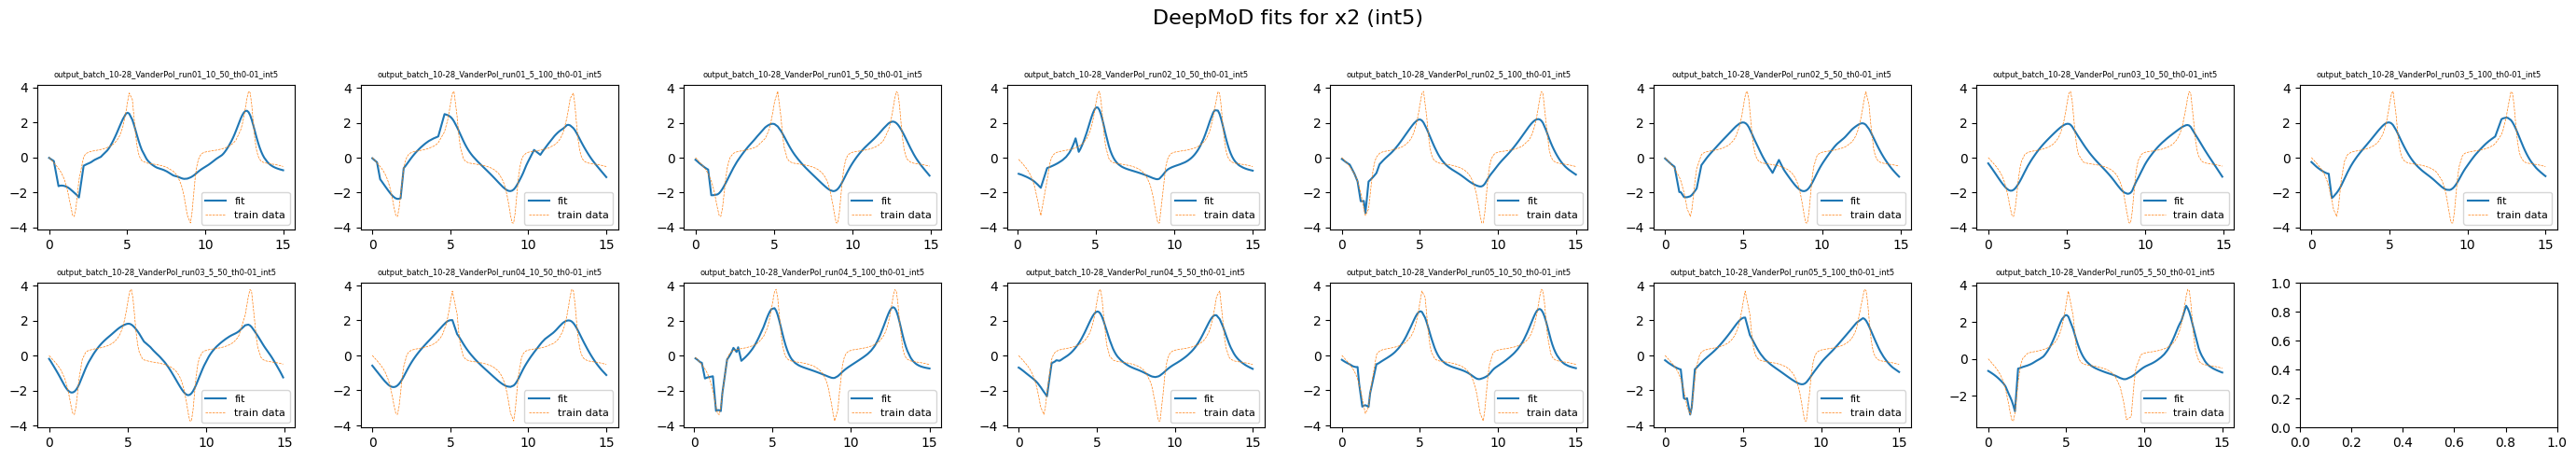

In [3]:
out_dir = out_dir_org # + "50_hidden_layer/"

for taxon in np.arange(1, n_taxa + 1):
# taxon = 1
    for spec in ["int5"]: # "int5", "th0-01"
        # spec = "only-fitting" # "int2" "only-fitting" --> set to "" to get all outputs of the folder
        runs = []
        for file in [s for s in os.listdir(out_dir) if spec in s and "." not in s]:
            m = re.search('run(.+?)_', file)
            if m:
                runs.append(file)
        # specify dimensions of the plot
        n_runs = len(runs)

        if(n_runs > 0):
            # n_runs = len(os.listdir(out_dir))
            # set plot dimensions
            n_col = min(math.ceil(n_runs/2), 10) # 4 rows, except count is <= 4
            n_row = math.ceil((n_runs)/n_col)

            # make plot
            fig, axs = plt.subplots(n_row, n_col)
            fig.set_figwidth(3.5*n_col)
            fig.set_figheight(2.5*n_row)
            fig.suptitle(f"DeepMoD fits for x{taxon} ({spec})",
                        size=16, y=1.0)
            fig.tight_layout(pad=2.0)  
            
            overall_min = 0
            overall_max = 0

            y = 0

            for run in runs:
                plot_path_tmp = f"{out_dir}{run}/Data/"
                if os.path.exists(f"{plot_path_tmp}/prediction_x{taxon}.csv"):
                    # read data files
                    df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
                    df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
                    # convert files to numpy array
                    data_train = np.array(df_data_train)
                    pred = np.array(df_pred)
                    # make plot
                    axs[int(y/n_col), (y % n_col)].plot(pred[:,1], pred[:,0], label = "fit")
                    axs[int(y/n_col), (y % n_col)].plot(data_train[:,1], data_train[:,0], label = "train data",  linewidth=0.5, linestyle = '--', color = colors[1])
                    # axs[int(y/n_col), (y % n_col)].scatter(data_train[:,1], data_train[:,0], label = "data", s = 1, color = colors[1])
                    axs[int(y/n_col), (y % n_col)].legend(fontsize="8")
                    hl = re.search(r"_(\d{1,2})_(\d{2,3})", run)
                    axs[int(y/n_col), (y % n_col)].set_title(run, size = 6)
                    y += 1

            #         # get smallest and largest value to scale the y axis
            #         current_min = min(data_train[:,0].min(), pred[:,0].min())
            #         current_max = max(data_train[:,0].max(), pred[:,0].max())
            #         overall_max = max(overall_max, current_max)
            #         overall_min = min(overall_min, current_min)
            
            # plt.setp(axs, ylim=(overall_min - 0.1, overall_max + 0.1))

            # save plots in one file
            # plt.savefig(f'{out_dir}/approximations_{spec}_x{taxon}.pdf',
            #             bbox_inches='tight', dpi = 300)
            # plt.close()
            # plt.show()

### Example for int2 vs. int4 vs. int5

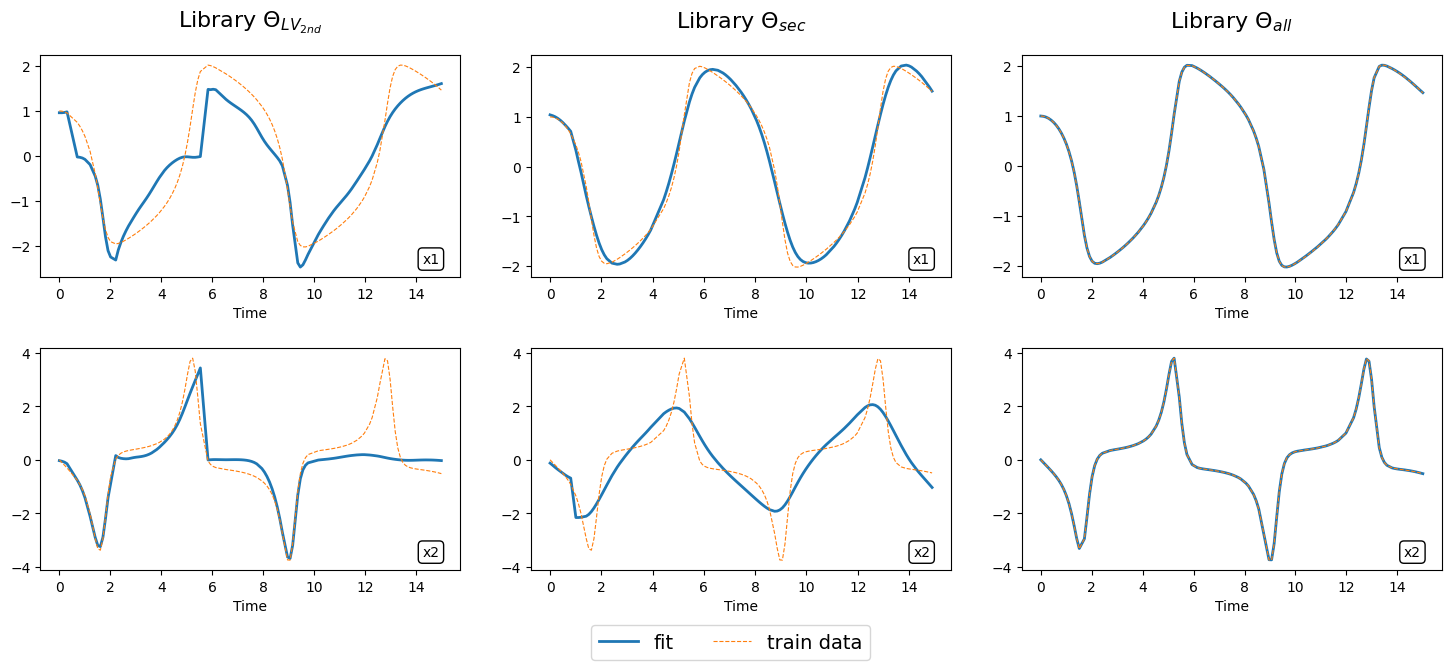

In [63]:
import matplotlib.patches as patches

out_dir = "C:/Users/Maria/Documents/Masterstudium/Masterarbeit/deepmod_output/output_LRZ_Cluster_10-27_structured/VanderPol/without_noise/"

# path of data file
filenames = [
    "output_batch_10-07_VanderPol_run07_5_50_th0-01_int2",
    "output_batch_10-28_VanderPol_run01_5_50_th0-01_int5",
    "output_batch_10-07_VanderPol_run03_5_50_th0-01_int4"
    ]

fig, axs = plt.subplots(2, 3)

fig.set_figwidth(15)
fig.set_figheight(6)
fig.tight_layout(pad=2.0, h_pad=3)

# function to import the datafile and put it into the right format
for run_idx, run in enumerate(filenames):
    plot_path_tmp = f"{out_dir}{run}/Data/"
    if os.path.exists(f"{plot_path_tmp}/prediction_x1.csv"):
        for taxon in np.arange(1, n_taxa+1):
            # read data files
            df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
            df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
            # convert files to numpy array
            data_train = np.array(df_data_train)
            pred = np.array(df_pred)
            # make plot
            axs[taxon-1, run_idx].plot(pred[:,1], pred[:,0], label = "fit", linewidth=2)
            axs[taxon-1, run_idx].plot(data_train[:,1], data_train[:,0], label = "train data", linewidth=0.8, linestyle = '--', color = colors[1])
            axs[taxon-1, run_idx].set_xlabel("Time")
            axs[taxon-1, run_idx].text(0.95, 0.05, f'x{taxon}', ha='right', va='bottom', transform=axs[taxon-1, run_idx].transAxes, bbox=dict(boxstyle="round", ec="black", fc="white"))

# set column titles
axs[0,0].set_title(r'Library $\Theta_{LV_{2nd}}$', fontsize = 16, pad = 20)
axs[0,1].set_title(r'Library $\Theta_{sec}$', fontsize = 16, pad = 20)
axs[0,2].set_title(r'Library $\Theta_{all}$', fontsize = 16, pad = 20)

# add one legend for all polts (in the lower center)
handles, labels = axs[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.08),
              fancybox=True, shadow=False, ncol = 4, fontsize = 14)

# save plots in one file
plt.savefig(f'{plot_output}VdP_comparing_libraries_fits.pdf',
            bbox_inches='tight', dpi = 300)

## Boxplot for comparison of the three libraries

C:\Users\Maria\AppData\Local\Temp\ipykernel_9792\1167950385.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


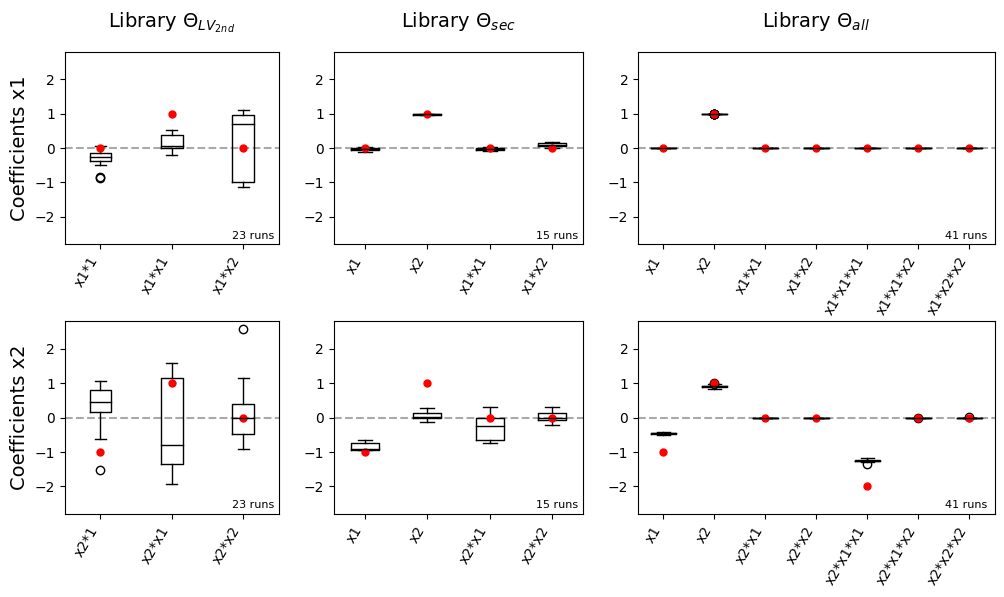

In [62]:
libraries = ["int2", "int5", "int4"]

# Function to create a boxplot for a given axis
def create_boxplot(ax, data, x_labels, title, true_coeffs = None, y_limits = None):
    boxplot = ax.boxplot(data)
    ax.set_title(title, fontsize = 12, pad = 16)
    ax.set_xticklabels(x_labels, rotation=60, ha="right")
    for median in boxplot['medians']:
        median.set_color('k')
    if true_coeffs is not None:
        ax.plot(range(1, len(true_coeffs)+1), true_coeffs, 'ro', markersize=5) # add true coeffs as red dots
    ax.axhline(y=0, color='#A9A9A9', linestyle='--', zorder=-3) # add horizontal line in 0
    if y_limits is not None:
        ax.set_ylim(y_limits)

# Function to generate boxplots for a specific library
def generate_boxplots(lib):
    runs = [s for s in os.listdir(out_dir) if lib in s and "." not in s and "th0-01" in s]

    if not runs:
        print(f"No runs found for {lib}.")
        return None

    list_coeffs_all = [pd.read_csv(f"{out_dir}{run}/Data/model_estimated_coeffs.csv", header=[0], index_col=[0]).to_numpy() for run in runs]
    df_library_tmp = pd.read_csv(f"{out_dir}{runs[-1]}/Data/model_library_values.csv", header=[0], index_col=[0])
    library_x1, library_x2 = df_library_tmp["x1"], df_library_tmp["x2"]

    coeffs_x1 = [[] for _ in range(list_coeffs_all[0].shape[0])]
    coeffs_x2 = [[] for _ in range(list_coeffs_all[0].shape[0])]
    for arr in list_coeffs_all:
        for i in range(arr.shape[0]):
            coeffs_x1[i].append(arr[i, 0])
            coeffs_x2[i].append(arr[i, 1])

    n_runs = len(coeffs_x1[0])

    return coeffs_x1, coeffs_x2, library_x1, library_x2, n_runs

# Adjusting the figure layout to add space for x3
width_ratios = [3, 3.5, 5]
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(2, len(libraries), width_ratios=width_ratios, wspace=0.2, hspace=0.4)
axs = np.array([[plt.subplot(gs[i, j]) for j in range(len(libraries))] for i in range(2)])

true_coeffs_x1 = [0, 1, 0, 0, 0, 0, 0]
true_coeffs_x2 = [-1, 1, 0, 0, -2, 0, 0] 

y_limits_row_1 = [-2.8, 2.8]
y_limits_row_2 = [-2.8, 2.8]

for i, lib in enumerate(libraries):
    result = generate_boxplots(lib)
    if result:
        coeffs_x1, coeffs_x2, library_x1, library_x2, n_runs = result
        create_boxplot(axs[0, i], coeffs_x1, library_x1, "", y_limits=y_limits_row_1, true_coeffs=true_coeffs_x1[0:len(coeffs_x1)])
        create_boxplot(axs[1, i], coeffs_x2, library_x2, "", y_limits=y_limits_row_2, true_coeffs=true_coeffs_x2[0:len(coeffs_x2)])
        axs[0, i].text(0.98, 0.02, f'{n_runs} runs', ha='right', va='bottom', fontsize = 8, transform=axs[0, i].transAxes)
        axs[1, i].text(0.98, 0.02, f'{n_runs} runs', ha='right', va='bottom', fontsize = 8, transform=axs[1, i].transAxes)

# set row names
axs[0, 0].set_ylabel("Coefficients x1", fontsize = 14)
axs[1, 0].set_ylabel("Coefficients x2", fontsize = 14)
# set column titles
axs[0, 0].set_title(r'Library $\Theta_{LV_{2nd}}$', fontsize = 14, pad = 18)
axs[0, 1].set_title(r'Library $\Theta_{sec}$', fontsize = 14, pad = 18)
axs[0, 2].set_title(r'Library $\Theta_{all}$', fontsize = 14, pad = 18)

plt.tight_layout()

# save plot
plt.savefig(f'{plot_output}/VdP_DeepMoD_coeff_barplots_red_dots.pdf', 
            bbox_inches='tight', dpi = 300)

# Summary over heatmaps of estimated coeffs

## Create one summary plot that contains all estimated model coefficients for all runs for one specification

The following code helps to summarize the output files over several runs.
It counts in multiple estimated coefficients outputs the library values that are not zero or even greater than 1e-5.

In [63]:
hl_number = 5
hl_size = 100
th = "0-01"
int_order = "4"

spec = f'_noise0-1_{hl_number}_{hl_size}_th{th}_int{int_order}'
# get list of available runs for the given setting
runs = []
for file in [s for s in os.listdir(out_dir) if spec in s]:
    m = re.search('run(.+?)_', file)
    if m:
        runs.append(m.group(1))

# specify dimensions of the plot
n_runs = len(runs)
# check if runs for these specifications are available
if n_runs > 0:
    # specify dimensions of the plot
    n_row = int(n_runs/4) + 1
    n_col = 4

    # make plot
    fig, axs = plt.subplots(n_row, n_col)
    fig.set_figwidth(4*n_col)
    fig.set_figheight(4*n_row)
    fig.suptitle(f"""{batch}\n
                hidden layers: number={hl_number} of size={hl_size},\n
                threshold = {th}""", y=1.0)
    fig.tight_layout(pad=3.0)
    for run in np.arange(20):
        out_tmp = f"{out_dir}output_{batch}_run{(run+1):02}{spec}/Data/"
        if os.path.exists(f"{out_tmp}model_estimated_coeffs.csv"):
            # read data files
            df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
            df_library_tmp = pd.read_csv(f"{out_tmp}model_library_values.csv", header=[0], index_col=[0])

            # define labels
            results = np.asarray(df_model_coeffs_tmp)
            strings = np.asarray(df_library_tmp)
            labels = (np.asarray(["{0}\n{1:.2f}".format(string, value)
                                for string, value in zip(strings.flatten(),
                                                        results.flatten())])
                    ).reshape(df_library_tmp.shape[0], n_taxa)
            
            # make heatmap
            sns.heatmap(df_model_coeffs_tmp, annot=labels, fmt="", cmap="vlag", center=0, ax=axs[int(run/n_col), run%n_col],
                         yticklabels=False)
            # sns.heatmap(df_model_coeffs_tmp, cmap="vlag", center=0, annot=True, ax=axs[int(run/n_col), run%n_col])
            axs[int(run/n_col), run%n_col].xaxis.tick_top()
            axs[int(run/n_col), run%n_col].tick_params(top=False) # left=False, 
            axs[int(run/n_col), run%n_col].set_title(f"run{(run+1):02}")
    plt.yticks(rotation=0)
    plt.show()

### Create one plot per specification that counts how often a library value was not 0

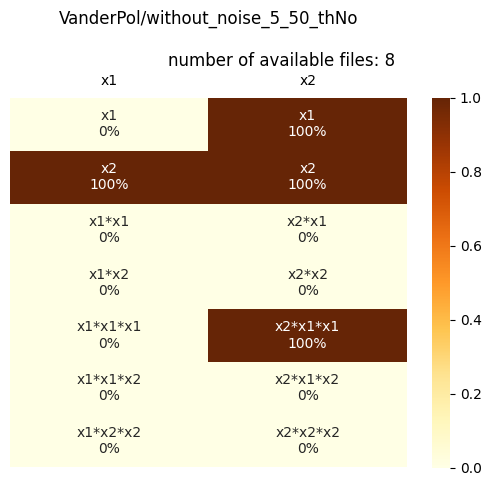

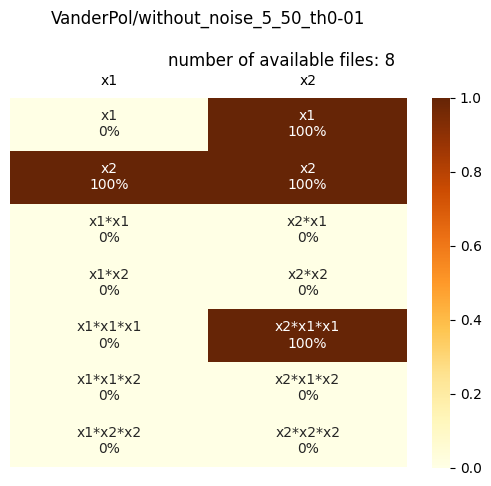

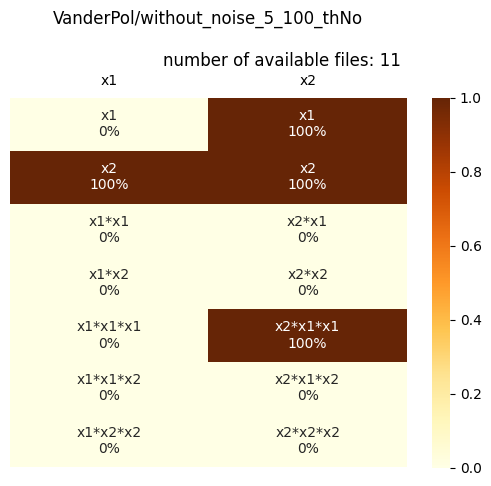

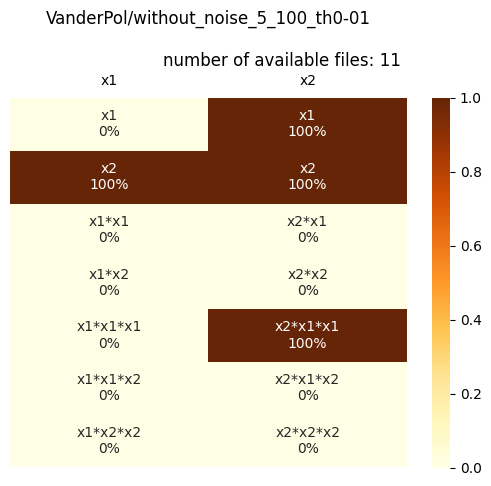

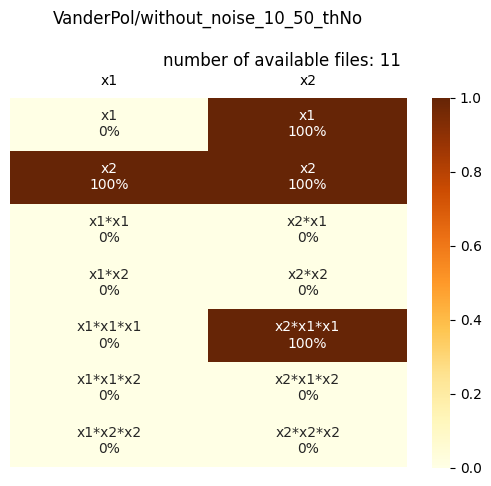

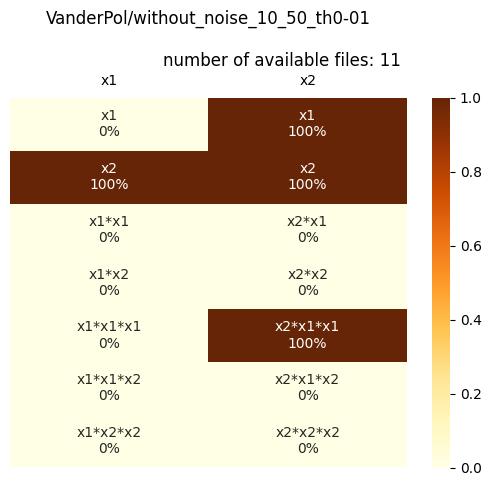

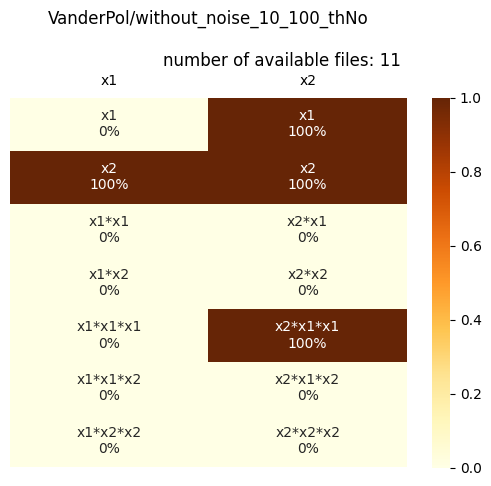

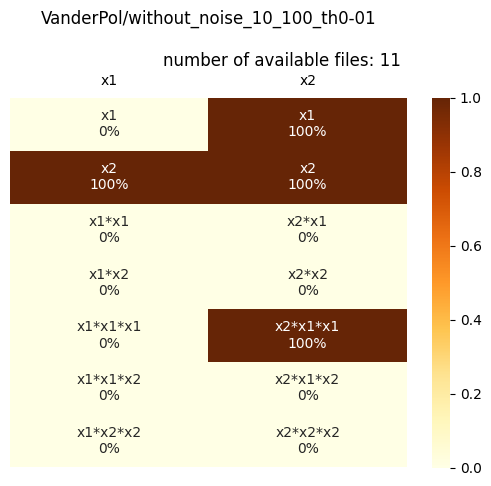

In [66]:
for hl_number in [5, 10, 50]: #[20, 50]:
    for hl_size in [50, 100]: #, 80, 100
        for th in ["No", "0-01"]: # "0_1", "0_01",
            int_order = 4
            spec = f'_{hl_number}_{hl_size}_th{th}_int{int_order}'
            # get list of available runs for the given setting
            runs = []
            for file in [s for s in os.listdir(out_dir) if spec in s]:
                m = re.search('run(.+?)_', file)
                if m:
                    runs.append(file)
            
            # specify dimensions of the plot
            n_runs = len(runs)
            # check if runs for these specifications are available
            if n_runs > 0:
                # create zero dataframe of the shape of the output
                file = os.listdir(out_dir)[0]
                out_tmp = f"{out_dir}{runs[0]}/Data/"
                df_sparsity_mask_all = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                df_sparsity_mask_all.iloc[:] = 0
                count = 0
                for run in runs:
                    out_tmp = f"{out_dir}{run}/Data/"
                    if os.path.exists(out_tmp):
                        df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                        df_sparsity_mask_tmp = (abs(df_model_coeffs_tmp) > 0.1).astype(int)
                        df_sparsity_mask_all = df_sparsity_mask_tmp.add(df_sparsity_mask_all)
                        count += 1

                df_sparsity_mask_all = df_sparsity_mask_all/count

                # read library values
                df_library_tmp = pd.read_csv(f"{out_tmp}model_library_values.csv", header=[0], index_col=[0])

                # define labels
                results = np.asarray(df_sparsity_mask_all)
                strings = np.asarray(df_library_tmp)
                labels = (np.asarray(["{0}\n{1:.0f}%".format(string, value*100)
                                    for string, value in zip(strings.flatten(),
                                                            results.flatten())])
                        ).reshape(df_library_tmp.shape[0], n_taxa)
                
                # heatmap
                ax = sns.heatmap(df_sparsity_mask_all, cmap="YlOrBr", vmin=0, vmax=1, annot=labels, fmt="", yticklabels=False)
                ax.xaxis.tick_top()
                ax.tick_params(left=False, top=False)
                ax.set_title(f"""{batch}_{hl_number}_{hl_size}_th{th}\n
                            number of available files: {count}""")
                plt.yticks(rotation=0)
                plt.show()

### Calculate mean values over all runs for each library coefficient

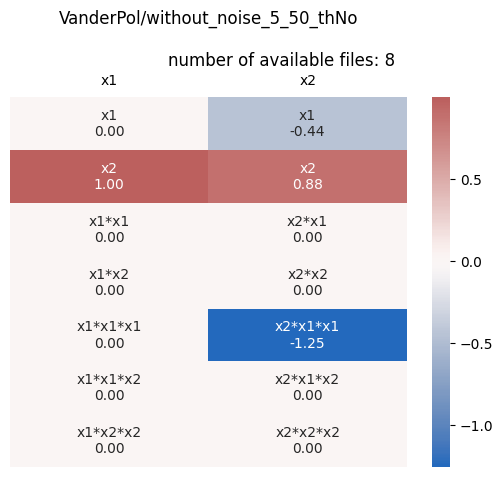

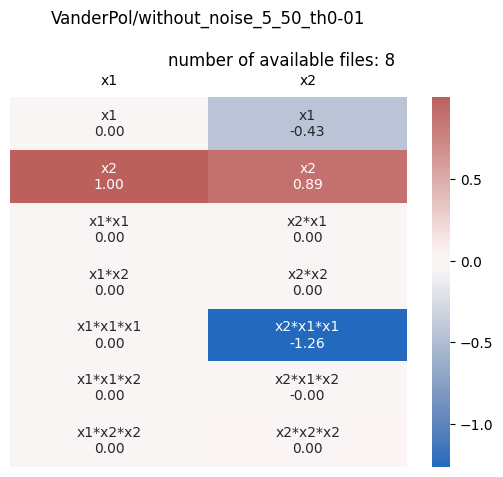

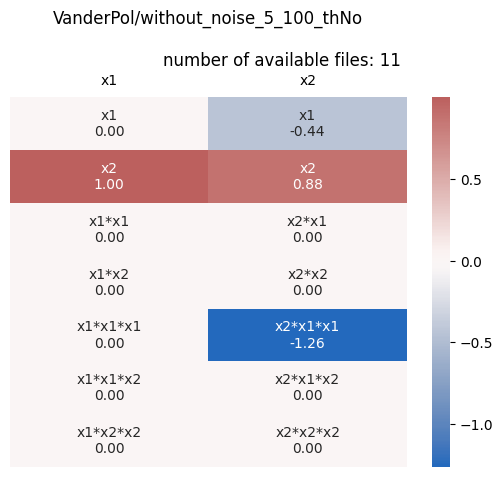

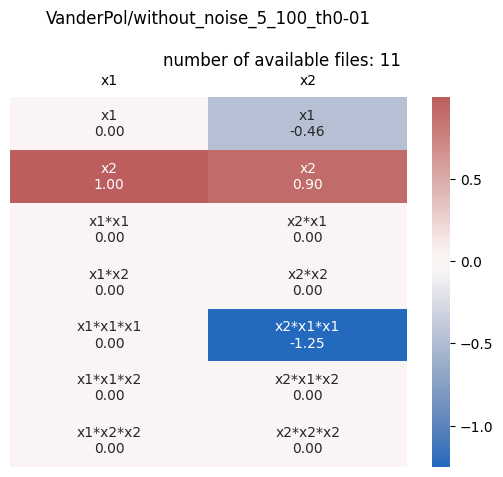

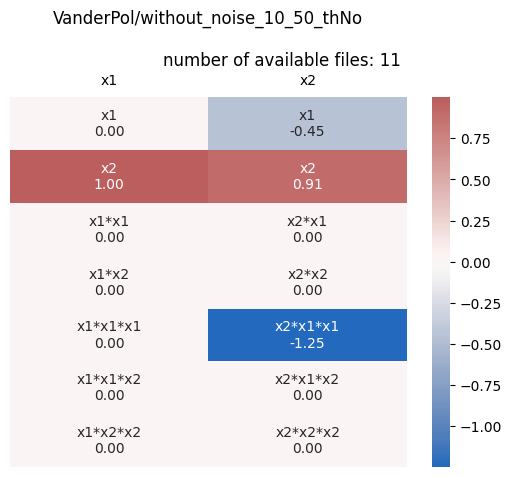

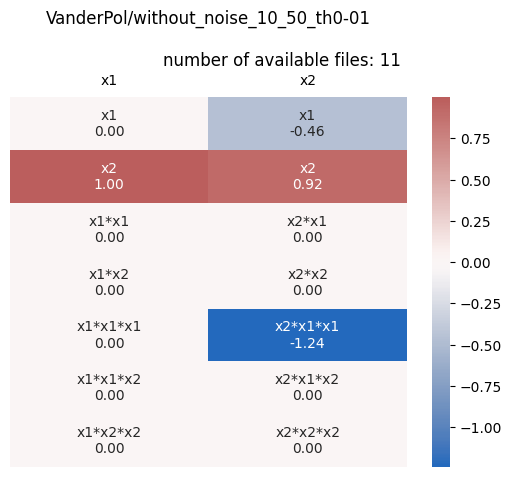

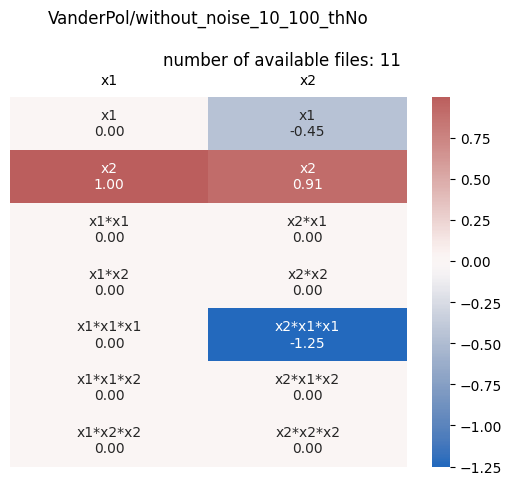

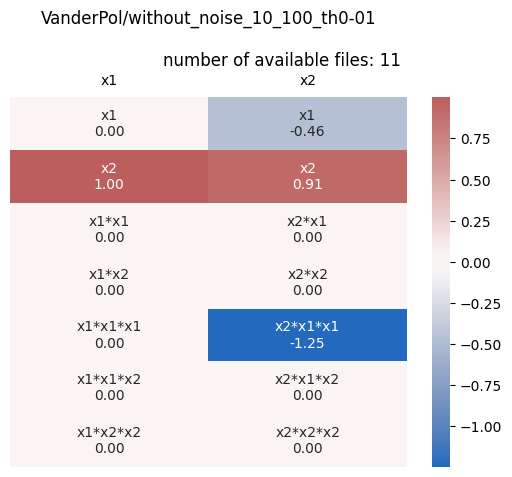

In [67]:
for hl_number in [5, 10, 50]:
    for hl_size in [50, 100]:
        for th in ["No", "0-01"]:
            int_order = 4
            spec = f'_{hl_number}_{hl_size}_th{th}_int{int_order}'
            # get list of available runs for the given setting
            runs = []
            for file in [s for s in os.listdir(out_dir) if spec in s]:
                m = re.search('run(.+?)_', file)
                if m:
                    runs.append(file)
            
            # specify dimensions of the plot
            n_runs = len(runs)
            # check if runs for these specifications are available
            if n_runs > 0:
                # create zero dataframe of the shape of the output
                file = os.listdir(out_dir)[0]
                out_tmp = f"{out_dir}{runs[0]}/Data/"
                df_sparsity_mask_all = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                df_sparsity_mask_all.iloc[:] = 0
                count = 0
                for run in runs:
                    out_tmp = f"{out_dir}{run}/Data/"
                    if os.path.exists(out_tmp):
                        df_model_coeffs_tmp = pd.read_csv(f"{out_tmp}model_estimated_coeffs.csv", header=[0], index_col=[0])
                        df_sparsity_mask_all += df_model_coeffs_tmp
                        count += 1

                df_sparsity_mask_all = df_sparsity_mask_all/count

                # read library values
                df_library_tmp = pd.read_csv(f"{out_tmp}model_library_values.csv", header=[0], index_col=[0])

                # define labels
                results = np.asarray(df_sparsity_mask_all)
                strings = np.asarray(df_library_tmp)
                labels = (np.asarray(["{0}\n{1:.2f}".format(string, value)
                                    for string, value in zip(strings.flatten(),
                                                            results.flatten())])
                        ).reshape(df_library_tmp.shape[0], n_taxa)
                
                # heatmap
                ax = sns.heatmap(df_sparsity_mask_all, cmap="vlag", center=0, annot=labels, fmt="", yticklabels=False)
                ax.xaxis.tick_top()
                ax.tick_params(left=False, top=False)
                ax.set_title(f"""{batch}_{hl_number}_{hl_size}_th{th}\n
                            number of available files: {count}""")
                plt.yticks(rotation=0)
                plt.show()